In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [4]:
#load dataset
(x_train, y_train),(x_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [5]:
#Normalize pixel values

x_train = x_train/255.0
x_test = x_test/255.0

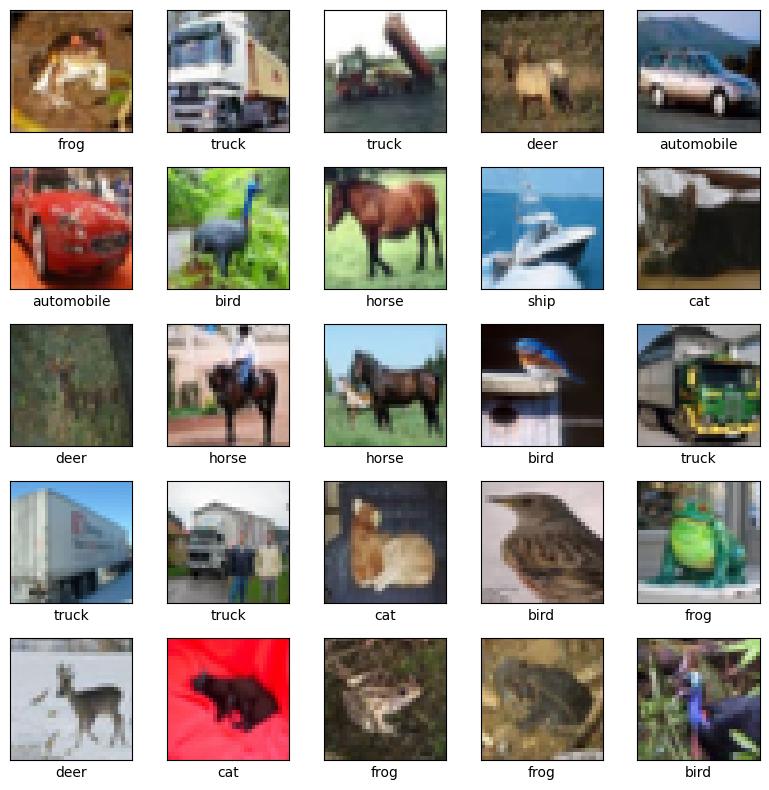

In [6]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])  # y_train is a 2D array, so we access the label via y_train[i][0]

plt.tight_layout()
plt.show()


In [7]:
#bulid CNN
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3),activation='relu'),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')


])

In [8]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
# Train the model
history=model.fit(x_train,y_train,epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10


1563/1563 [==============================] - 25s 14ms/step - loss: 1.5280 - accuracy: 0.4443 - val_loss: 1.3392 - val_accuracy: 0.5231
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1411 - accuracy: 0.5962 - val_loss: 1.1124 - val_accuracy: 0.6136
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.9881 - accuracy: 0.6528 - val_loss: 0.9665 - val_accuracy: 0.6627
Epoch 4/10
1563/1563 [==============================] - 23s 15ms/step - loss: 0.8881 - accuracy: 0.6885 - val_loss: 0.9251 - val_accuracy: 0.6798
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 0.8123 - accuracy: 0.7162 - val_loss: 0.9101 - val_accuracy: 0.6920
Epoch 6/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7561 - accuracy: 0.7348 - val_loss: 0.8215 - val_accuracy: 0.7122
Epoch 7/10
1563/1563 [==============================] - 21s 13ms/step - loss: 0.7096 - accuracy: 0.7497 - val_loss: 0.8184

In [10]:
#Evaluate on Test data
test_loss, test_acc=model.evaluate(x_test, y_test)
print(f"Test Accuracy:{test_acc:4f}")


313/313 [==============================] - 2s 7ms/step - loss: 0.8354 - accuracy: 0.7215
Test Accuracy:0.721500


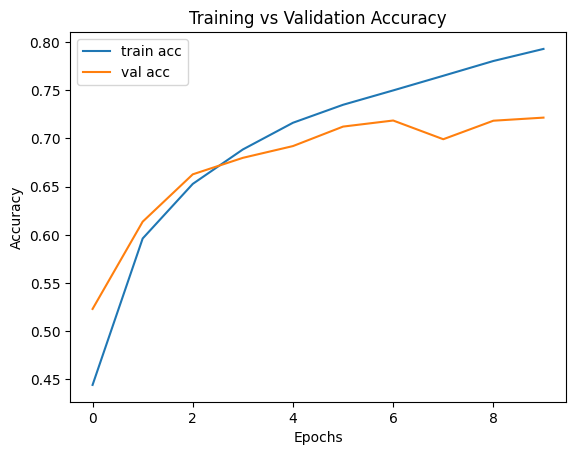

In [11]:
#  Plot Accuracy & Loss
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
